# Caso Práctico Final: Predicción de Fraude

El conjunto de datos para este caso práctico trata sobre fraude de cuentas bancarias (BAF) y se publicó en NeurIPS 2022. Comprende un total de 6 conjuntos de datos tabulares sintéticos diferentes sobre fraude de cuentas bancarias. 

El enlace a la publicación puedes encontrarlo aquí:
[Enlace publicación](https://arxiv.org/pdf/2211.13358.pdf)

Para este caso práctico trabajaremos con el dataset preprocesado en el caso final de la asignatura Data Science: Análisis Exploratorio de Datos. Siempre es necesario preprocesar los datos para adaptarlos para que funcionen como entrada de un modelo de Machine Learning, de modo que aprovecharemos esta parte del trabajo ya hecha.


In [87]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 40)

# Lectura de datos

Utiliza los datos que preocesaste en el caso final de la asignatura de Análisis Exploratorio de Datos, ya que en dicho caso práctico los datos obtenidos serían los necesarios para introducir a un modelo de machine learning.

In [90]:
ls -ltr BD

total 2136520
-rw-r--r--@ 1 luismontalvo  staff  213427735 16 sep 15:23 Base.csv
-rw-r--r--  1 luismontalvo  staff  374306346 27 oct 01:52 DLBase27102024PCA.csv
-rw-r--r--  1 luismontalvo  staff  196479756 27 oct 02:04 DLBase27102024PC2.csv
-rw-r--r--@ 1 luismontalvo  staff  251100225 27 oct 02:25 BDBase27102024.csv
-rw-r--r--  1 luismontalvo  staff   58572852 29 oct 15:28 BDLPCA22910241528.csv


In [92]:
dft=pd.read_csv('BD/base.csv')
df=pd.read_csv('BD/BDLPCA22910241528.csv')

In [95]:
numerica_columns=df.select_dtypes(exclude='object').columns
categorica_columns=df.select_dtypes(include='object').columns

In [97]:
numerica_columns

Index(['0', '1', '2'], dtype='object')

In [99]:
categorica_columns

Index([], dtype='object')

In [101]:
df['fraud_bool']=dft['fraud_bool']

In [103]:
df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [105]:
df

,0,1,2,fraud_bool
0,3.420146,3.344860,0.585656,0
1,2.262991,0.932922,-2.493706,0
2,1.369714,0.398870,0.408199,0
3,3.626003,-0.178171,-0.587658,0
4,1.758117,0.995225,1.553992,0
...,...,...,...,...
999995,-3.064289,1.717249,-0.716277,0
999996,-3.173739,1.069958,-1.602863,0
999997,-3.201100,-0.528139,1.283837,0
999998,-1.753030,-0.579613,-0.427402,0


### Análisis de la variable objetivo

Plotea un diagrama de barras de la variable objetivo y obten el porcentaje de ceros y unos ¿Qué observas?

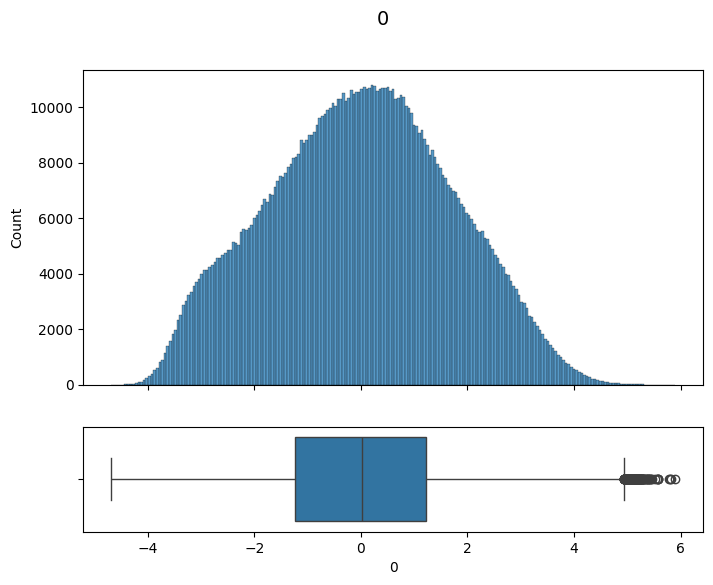

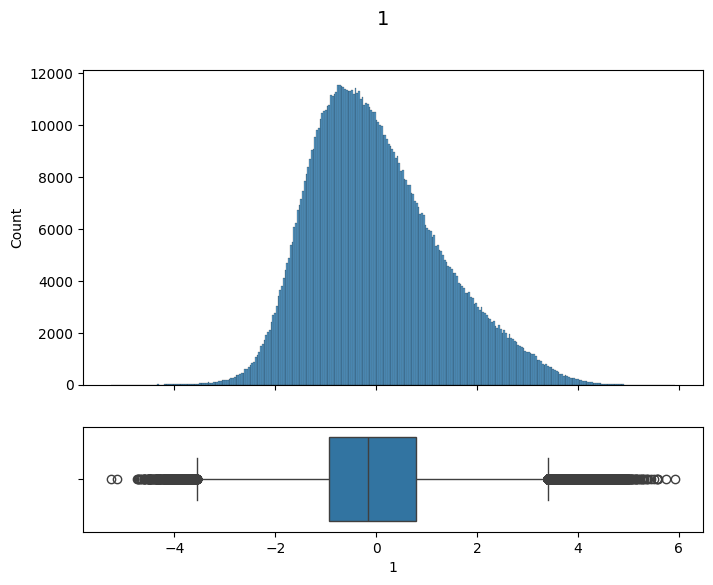

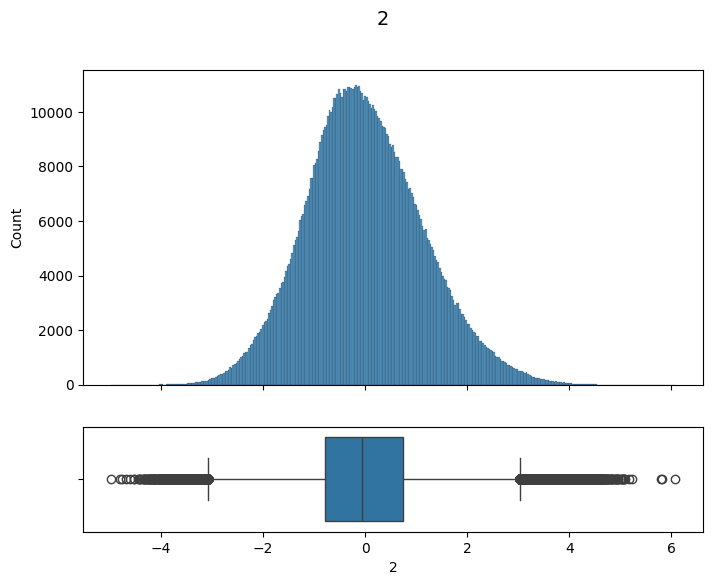

In [109]:
for col in numerica_columns:
    f, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 6), sharex=True, height_ratios=[3,1])
    f.suptitle(col, fontsize=14)
    sns.histplot(df[col], ax=ax[0])
    sns.boxplot(df[col], ax=ax[1], orient='h')
    plt.show()

# Clasificación

## Técnicas de balanceo

Hay diferentes técnicas que nos permiten lidiar con el desbalanceo de la variable objetivo. Aquí se describen algunas de ellas:

1. Remuestreo de datos:
    * Sobremuestreo (Oversampling): Aumenta el número de instancias de la clase minoritaria.
    * Submuestreo (Undersampling): Reduce el número de instancias de la clase mayoritaria.
    * Remuestreo combinado: Combina técnicas de sobremuestreo y submuestreo para equilibrar las clases.
2. Generación de muestras sintéticas:
    * SMOTE (Synthetic Minority Over-sampling Technique): Genera nuevas instancias sintéticas de la clase minoritaria mediante interpolación entre instancias similares.
3. Ponderación de clases:
    * Ajusta los pesos de las clases durante el entrenamiento para dar más importancia a la clase minoritaria.

A continuación genera diferentes datasets aplicando las diferentes técnicas e implementa un modelo de clasificación con cada uno de ellos y analiza las diferencias.


In [113]:
X = df.drop('fraud_bool', axis=1)  # 'fraud_bool' es la columna objetivo
y = df['fraud_bool']

In [115]:
#En primer lugar divide los datos en conjunto de entrenamiento y train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Las técnicas de balanceo se aplicarán sobre los conjuntos de entrenamiento. El conjunto de test debe de ser el inicial, que sea un conjunto que el modelo no haya visto ni haya sido modificado.

### Oversampling: 
Implica duplicar instancias aleatorias de la clase minoritaria hasta que se equilibre con la clase mayoritaria.
El código para realizar esta ténica se proporciona.

In [119]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

### Undersampling: 
Implica eliminar instancias aleatorias de la clase mayoriataria hasta que se equilibre con la clase mayoritaria.
El código para realizar esta ténica se proporciona.

In [122]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

### SMOTE: 
SMOTE genera instancias sintéticas de la clase minoritaria basándose en los datos existentes, lo que reduce el riesgo de sobreajuste.
El código para realizar esta ténica se proporciona.

In [125]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Dataset original: 
Ejecuta el modelo y analiza sus métricas con el dataset original desbalanceado. ¿Qué observas? ¿Qué conclusiones puedes extraer?

## Modelado

Para este caso práctico aplicara el algoritmo Random Forest para calcular las predicciones. Aplica este modelo utilizando cada uno de los conjuntos de datos generados anteriormente y obtén las métricas para evaluar el rendimienot del modelo. ¿Qué técnica ha funcionado mejor? 
¿Por qué?

Si no recuerdas como realizar un modelo de clasificación y su evaluación, puedes repasar lo visto en el caso práctico de la Unidad 1.

*Idea*:En el caso que creas necesario obtén las métricas de predicción sobre el conjunto de entrenamiento para analizar si hay overfitting.



### Oversampling dataset
Entrena el modelo con el dataset sobre el que aplicaste la técnica de oversampling y analiza sus métricas. ¿Qué observas? ¿Qué conclusiones puedes extraer?

In [130]:
# Paso 1: Entrenar el modelo con los datos sobremuestreados
model = RandomForestClassifier(random_state=42)
model.fit(X_over, y_over)

RandomForestClassifier(random_state=42)

In [134]:
# Paso 2: Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

In [136]:
# Paso 3: Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [140]:
print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 0.9890
Precisión (Precision): 0.1154
Sensibilidad (Recall): 0.0037
F1 Score: 0.0072
Matriz de confusión:
[[296694     92]
 [  3202     12]]


### Undersampling dataset
Entrena el modelo con el dataset sobre el que aplicaste la técnica de undersampling y analiza sus métricas. ¿Qué observas? ¿Qué conclusiones puedes extraer?

In [143]:
# Paso 1: Entrenar el modelo con los datos submuestreados
model = RandomForestClassifier(random_state=42)
model.fit(X_under, y_under)

RandomForestClassifier(random_state=42)

In [145]:
# Paso 2: Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

In [147]:
# Paso 3: Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [149]:
print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 0.6552
Precisión (Precision): 0.0185
Sensibilidad (Recall): 0.5980
F1 Score: 0.0358
Matriz de confusión:
[[194627 102159]
 [  1292   1922]]


### SMOTE dataset
Entrena el modelo con el dataset sobre el que aplicaste la técnica de SMOTE y analiza sus métricas. ¿Qué observas? ¿Qué conclusiones puedes extraer?

In [152]:
# Paso 1: Entrenar el modelo con los datos resampleados usando SMOTE
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [174]:
# Paso 2: Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

In [176]:
# Paso 3: Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [178]:
print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 0.9786
Precisión (Precision): 0.0785
Sensibilidad (Recall): 0.0927
F1 Score: 0.0850
Matriz de confusión:
[[293287   3499]
 [  2916    298]]


#### Conclusiones

¿Qué conclusiones sacas tras aplicar el modelo utilizando las diferentes técnicas?

De los tres reportes, el tercero (inicial) presenta el mejor desempeño en cuanto a la detección de fraudes (sensibilidad alta en clase positiva), a pesar de la precisión global y los falsos positivos. Para problemas de fraude, suele ser más importante maximizar el recall, pues permite capturar el mayor número posible de casos fraudulentos. El reporte 2 sigue como la segunda opción, equilibrando ligeramente mejor la precisión y el recall, aunque con un recall más bajo que el reporte 3.

# Clustering

En esta sección queremos segmentar los tipos de transacciones fraudulentas y no fraudulentas para analizar si hay tipos de transacciones con patrones comunes.
Para ello aplica un algoritmo de clustering. Tal y como aprendimos en la Unidad 2, utilizaremos k-Means.

Elimina la variable objetivo para la segmentación.

#### Dataset original

In [512]:
df=pd.read_csv('BD/BDBase27102024.csv') # Si necesitas cargar el CSV

In [513]:
df['velocity_6h'].isnull().sum()

44

Aplica el método del codo para obtener el número óptimo de clusters previamente

Aplica el algoritmo k_means. Para cada conjunto de datos printea el número de registros que pertenen a dicho cluster y estadísticos de cada variable numérica. Para las variables binarias puedes graficar la cantidad de 0s y 1s por cluster.
¿Qué observas? ¿Tienen los clusters un tamaño similar? 

*Idea*: Puedes guardar la media por ejemplo de cada variable por cluster en un dataframe, de forma que tengas todos los valores agrupados y se más fácil de comparar.

In [518]:
# se eliminan columnas al no tener relevancia 
df.drop('velocity_6h', axis=1, inplace=True)
df.drop('prev_address_months_count', axis=1, inplace=True)


In [520]:
numerica_columns=df.select_dtypes(exclude='object').columns

In [522]:
df

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,25.0,40,0.006713,102.453711,AA,6.966024,8.968518,1.791759,1.791759,CB,163.0,1.0,BC,0,1,9.0,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,89.0,20,0.010044,-0.849551,AD,7.413970,8.656303,1.386294,2.944439,CA,154.0,1.0,BC,1,1,2.0,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,14.0,40,0.012241,-1.490386,AB,6.999422,8.607580,2.772589,2.484907,CA,89.0,1.0,BC,0,1,30.0,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,14.0,30,0.006967,-1.863101,AB,8.155936,8.818237,2.484907,2.639057,CA,90.0,1.0,BC,0,1,1.0,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,29.0,40,1.908449,47.152498,AA,7.757906,8.541895,0.693147,1.945910,CA,91.0,0.0,BC,1,1,26.0,0,200.0,0,INTERNET,3.743048,other,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,143.0,30,0.050074,-0.826239,AB,6.274762,8.010044,3.761200,2.197225,CA,305.0,1.0,BB,1,1,31.0,0,1500.0,0,INTERNET,16.967770,other,0,1,7
999996,0,0.9,0.824544,193.0,30,0.009545,0.008307,AC,6.013715,7.907466,0.000000,1.791759,CA,235.0,0.0,BA,1,1,0.0,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,7
999997,0,0.8,0.140891,202.0,10,0.057596,50.609995,AA,6.620073,8.189334,1.098612,1.386294,CA,195.0,1.0,BE,0,1,31.0,0,200.0,0,INTERNET,16.068595,other,0,1,7
999998,0,0.9,0.002480,3.0,30,0.023089,-1.313387,AB,6.562444,8.782997,2.079442,2.197225,CA,148.0,0.0,BD,0,1,1.0,0,200.0,0,INTERNET,1.378683,linux,1,1,7


In [524]:
numerica_columns = [x for x in numerica_columns if x != 'fraud_bool']

In [526]:
numerica_columns

['income',
 'name_email_similarity',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_24h',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month']

In [560]:
df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [530]:
#Seleccionamos las variables de nuestro conjunto de datos
df[numerica_columns]

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0.3,0.986506,25.0,40,0.006713,102.453711,6.966024,8.968518,1.791759,1.791759,163.0,1.0,0,1,9.0,0,1500.0,0,16.224843,1,1,0
1,0.8,0.617426,89.0,20,0.010044,-0.849551,7.413970,8.656303,1.386294,2.944439,154.0,1.0,1,1,2.0,0,1500.0,0,3.363854,1,1,0
2,0.8,0.996707,14.0,40,0.012241,-1.490386,6.999422,8.607580,2.772589,2.484907,89.0,1.0,0,1,30.0,0,200.0,0,22.730559,0,1,0
3,0.6,0.475100,14.0,30,0.006967,-1.863101,8.155936,8.818237,2.484907,2.639057,90.0,1.0,0,1,1.0,0,200.0,0,15.215816,1,1,0
4,0.9,0.842307,29.0,40,1.908449,47.152498,7.757906,8.541895,0.693147,1.945910,91.0,0.0,1,1,26.0,0,200.0,0,3.743048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.8,0.124690,143.0,30,0.050074,-0.826239,6.274762,8.010044,3.761200,2.197225,305.0,1.0,1,1,31.0,0,1500.0,0,16.967770,0,1,7
999996,0.9,0.824544,193.0,30,0.009545,0.008307,6.013715,7.907466,0.000000,1.791759,235.0,0.0,1,1,0.0,1,1000.0,0,1.504109,0,1,7
999997,0.8,0.140891,202.0,10,0.057596,50.609995,6.620073,8.189334,1.098612,1.386294,195.0,1.0,0,1,31.0,0,200.0,0,16.068595,0,1,7
999998,0.9,0.002480,3.0,30,0.023089,-1.313387,6.562444,8.782997,2.079442,2.197225,148.0,0.0,0,1,1.0,0,200.0,0,1.378683,1,1,7


In [456]:
numerica_columns=df.select_dtypes(exclude='object').columns

In [538]:
df[numerica_columns]

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0.3,0.986506,25.0,40,0.006713,102.453711,6.966024,8.968518,1.791759,1.791759,163.0,1.0,0,1,9.0,0,1500.0,0,16.224843,1,1,0
1,0.8,0.617426,89.0,20,0.010044,-0.849551,7.413970,8.656303,1.386294,2.944439,154.0,1.0,1,1,2.0,0,1500.0,0,3.363854,1,1,0
2,0.8,0.996707,14.0,40,0.012241,-1.490386,6.999422,8.607580,2.772589,2.484907,89.0,1.0,0,1,30.0,0,200.0,0,22.730559,0,1,0
3,0.6,0.475100,14.0,30,0.006967,-1.863101,8.155936,8.818237,2.484907,2.639057,90.0,1.0,0,1,1.0,0,200.0,0,15.215816,1,1,0
4,0.9,0.842307,29.0,40,1.908449,47.152498,7.757906,8.541895,0.693147,1.945910,91.0,0.0,1,1,26.0,0,200.0,0,3.743048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.8,0.124690,143.0,30,0.050074,-0.826239,6.274762,8.010044,3.761200,2.197225,305.0,1.0,1,1,31.0,0,1500.0,0,16.967770,0,1,7
999996,0.9,0.824544,193.0,30,0.009545,0.008307,6.013715,7.907466,0.000000,1.791759,235.0,0.0,1,1,0.0,1,1000.0,0,1.504109,0,1,7
999997,0.8,0.140891,202.0,10,0.057596,50.609995,6.620073,8.189334,1.098612,1.386294,195.0,1.0,0,1,31.0,0,200.0,0,16.068595,0,1,7
999998,0.9,0.002480,3.0,30,0.023089,-1.313387,6.562444,8.782997,2.079442,2.197225,148.0,0.0,0,1,1.0,0,200.0,0,1.378683,1,1,7


## Estandarizamos los datos

In [540]:
scaler = StandardScaler()

In [544]:
X_scaled = scaler.fit_transform(df[numerica_columns])

In [546]:
X_scaled.shape

(1000000, 22)

In [550]:
X_scaled.shape

(1000000, 22)

In [568]:
df_scaled = pd.DataFrame(X_scaled,columns=numerica_columns)

In [570]:
df_scaled

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,-0.904778,1.704497,-0.696644,0.524782,-0.295501,4.634885,-0.330368,1.686252,-0.354344,-0.818002,0.672461,0.939436,-0.845868,0.352143,-0.176256,-0.535706,2.018520,-0.160921,1.080517,0.856307,-0.101305,-1.488092
1,0.817326,0.427954,0.027285,-1.138310,-0.290328,-0.470003,0.382688,0.727229,-0.539285,1.357506,0.560201,0.939436,1.182218,0.352143,-0.765758,-0.535706,2.018520,-0.160921,-0.520482,0.856307,-0.101305,-1.488092
2,0.817326,1.739779,-0.821069,0.524782,-0.286917,-0.501671,-0.277203,0.577568,0.093032,0.490208,-0.250572,0.939436,-0.845868,0.352143,1.592250,-0.535706,-0.647820,-0.160921,1.890380,-1.167806,-0.101305,-1.488092
3,0.128484,-0.064312,-0.821069,-0.306764,-0.295107,-0.520089,1.563775,1.224639,-0.038186,0.781144,-0.238099,0.939436,-0.845868,0.352143,-0.849972,-0.535706,-0.647820,-0.160921,0.954908,0.856307,-0.101305,-1.488092
4,1.161747,1.205752,-0.651398,0.524782,2.657447,1.902092,0.930177,0.375805,-0.855444,-0.527066,-0.225625,-1.039149,1.182218,0.352143,1.255392,-0.535706,-0.647820,-0.160921,-0.473278,-1.167806,-0.101305,-1.488092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.817326,-1.276279,0.638099,-0.306764,-0.228172,-0.468851,-1.430742,-1.257870,0.543958,-0.052748,2.443688,0.939436,1.182218,0.352143,1.676465,-0.535706,2.018520,-0.160921,1.173000,-1.167806,-0.101305,1.679338
999996,1.161747,1.144317,1.203668,-0.306764,-0.291103,-0.427611,-1.846286,-1.572955,-1.171602,-0.818002,1.570548,-1.039149,1.182218,0.352143,-0.934187,1.866694,0.993005,-0.160921,-0.751992,-1.167806,-0.101305,1.679338
999997,0.817326,-1.220244,1.305470,-1.969856,-0.216491,2.072949,-0.881064,-0.707148,-0.670503,-1.583256,1.071611,0.939436,-0.845868,0.352143,1.676465,-0.535706,-0.647820,-0.160921,1.061066,-1.167806,-0.101305,1.679338
999998,1.161747,-1.698969,-0.945494,-0.306764,-0.270073,-0.492924,-0.972800,1.116392,-0.223126,-0.052748,0.485360,-1.039149,-0.845868,0.352143,-0.849972,-0.535706,-0.647820,-0.160921,-0.767606,0.856307,-0.101305,1.679338


In [566]:
df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [574]:
kmeans = KMeans(n_clusters=8, random_state=0)  # Ajusta el número de clusters según tus necesidades
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[numerica_columns])  # Si escalaste, usa `df_scaled`

In [625]:
df_scaled.shape

(1000000, 23)

In [627]:
df.shape

(1000000, 29)

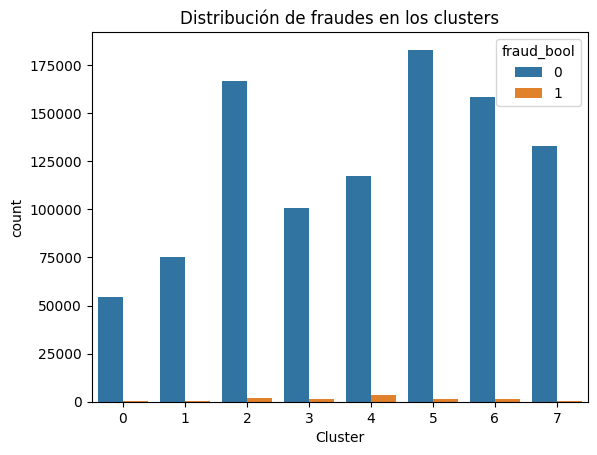

In [581]:
# Análisis de clusters en relación con 'fraud_bool'
sns.countplot(x='Cluster', hue=df['fraud_bool'], data=df_scaled)
plt.title('Distribución de fraudes en los clusters')
plt.show()

#### Sólo fraude

Ahora realiza la clusterización sólo seleccionando las transacciones fraudulentas

# Standarizamos solo Fraude

In [49]:
df_fraudulent = df[df['fraud_bool'] == 1]

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
43,1,0.9,0.570800,157.0,60,0.005891,35.337538,AA,8.313852,8.369442,1.098612,2.890372,CA,131.0,1.0,BA,1,1,30.0,0,1500.0,0,INTERNET,4.036394,windows,1,1,0
140,1,0.1,0.993219,67.0,20,0.015215,92.120139,AA,7.084226,8.811257,3.637586,1.945910,CA,79.0,1.0,BB,0,1,25.0,0,1500.0,0,INTERNET,12.928072,windows,0,1,0
284,1,0.8,0.794351,376.0,60,2.940534,41.422110,AA,6.704414,8.839714,3.850148,1.386294,CC,0.0,1.0,BA,1,0,28.0,0,1500.0,0,INTERNET,2.550167,linux,0,1,0
314,1,0.7,0.090000,58.0,50,0.004126,-1.244047,AD,8.297045,8.664859,1.098612,1.945910,CA,177.0,1.0,BA,0,1,27.0,0,1500.0,0,INTERNET,3.500856,windows,0,1,0
561,1,0.9,0.998248,45.0,30,0.010113,33.067538,AA,6.265301,8.204137,2.833213,2.564949,CA,273.0,1.0,BA,0,1,1.0,1,2000.0,0,INTERNET,44.536211,windows,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999862,1,0.3,0.346834,13.0,20,0.007059,-0.994025,AC,6.541030,8.022876,0.000000,2.302585,CE,0.0,1.0,BA,0,1,0.0,0,200.0,0,INTERNET,23.525141,windows,1,1,7
999879,1,0.7,0.161950,209.0,40,0.008162,-0.837462,AC,6.522093,7.961601,0.693147,2.397895,CA,272.0,0.0,BA,1,0,0.0,0,2000.0,0,INTERNET,9.366778,windows,0,1,7
999923,1,0.4,0.098119,139.0,30,0.028449,-1.383748,AB,5.846439,8.276378,0.693147,2.197225,CB,158.0,0.0,BA,1,0,1.0,0,500.0,0,INTERNET,2.363665,windows,0,1,7
999938,1,0.8,0.830047,73.0,40,0.009710,-1.439571,AC,6.436150,7.981485,0.000000,0.693147,CA,295.0,1.0,BA,0,1,0.0,0,1900.0,0,INTERNET,1.596140,linux,0,1,7


In [324]:
df_fraudulent.shape

(11029, 28)

In [264]:
scaler = StandardScaler()

In [266]:
numerica_columns = [x for x in numerica_columns if x != 'fraud_bool']

In [268]:
frau_X_scaled = scaler.fit_transform(df_fraudulent[numerica_columns])

In [270]:
# Convertimos a DataFrame con los datos scalados
df_fraudulent_scaled = pd.DataFrame(frau_X_scaled,columns=numerica_columns)

In [272]:
df_fraudulent_scaled

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0.803431,0.600955,0.494592,1.462764,-0.311392,1.887668,1.781089,-0.048678,-0.425109,1.495664,-0.159013,0.714005,1.718031,0.419135,1.526796,-0.303639,1.035374,-0.230192,-0.433144,1.388170,-0.247875,-1.542404
1,-2.208991,2.030006,-0.560254,-1.593998,-0.296831,5.303921,-0.203863,1.297152,0.798861,-0.017044,-0.679232,0.714005,-0.582062,0.419135,1.128260,-0.303639,1.035374,-0.230192,0.485354,-0.720373,-0.247875,-1.542404
2,0.426878,1.357231,3.061385,1.462764,4.271641,2.253739,-0.816984,1.383837,0.901331,-0.913359,-1.469565,0.714005,1.718031,-2.385866,1.367382,-0.303639,1.035374,-0.230192,-0.586670,-0.720373,-0.247875,-1.542404
3,0.050325,-1.025602,-0.665739,0.698574,-0.314149,-0.313216,1.753958,0.851202,-0.425109,-0.017044,0.301180,0.714005,-0.582062,0.419135,1.287674,-0.303639,1.035374,-0.230192,-0.488465,-0.720373,-0.247875,-1.542404
4,0.803431,2.047021,-0.818106,-0.829807,-0.304798,1.751097,-1.525832,-0.552224,0.411095,0.974447,1.261585,0.714005,-0.582062,0.419135,-0.784714,3.293388,1.812667,-0.230192,3.750434,-0.720373,-0.247875,-1.542404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11024,-1.455885,-0.156725,-1.193162,-1.593998,-0.309568,-0.298173,-1.080731,-1.104369,-0.954720,0.554229,-1.469565,0.714005,-0.582062,0.419135,-0.864422,-0.303639,-0.985586,-0.230192,1.580018,1.388170,-0.247875,1.485342
11025,0.050325,-0.782194,1.104059,-0.065617,-0.307845,-0.288754,-1.111300,-1.291022,-0.620572,0.706883,1.251581,-1.351778,1.718031,-2.385866,-0.864422,-0.303639,1.812667,-0.230192,0.117477,-0.720373,-0.247875,1.485342
11026,-1.079333,-0.998136,0.283623,-0.829807,-0.276163,-0.321621,-2.201991,-0.332167,-0.620572,0.385477,0.111100,-1.351778,1.718031,-2.385866,-0.784714,-0.303639,-0.519211,-0.230192,-0.605935,-0.720373,-0.247875,1.485342
11027,0.426878,1.477993,-0.489931,-0.065617,-0.305427,-0.324979,-1.250035,-1.230453,-0.954720,-2.023546,1.481678,0.714005,-0.582062,0.419135,-0.864422,-0.303639,1.657208,-0.230192,-0.685220,-0.720373,-0.247875,1.485342


In [312]:
# Creamos la instancia
pca =  PCA()

In [322]:
pca.fit(frau_X_scaled)

PCA()

In [338]:
pca.explained_variance_ratio_.round(3)

array([0.095, 0.089, 0.067, 0.065, 0.056, 0.05 , 0.049, 0.047, 0.046,
       0.045, 0.043, 0.04 , 0.039, 0.039, 0.038, 0.037, 0.035, 0.028,
       0.027, 0.025, 0.02 , 0.019])

In [342]:
# Varianza acumulada explicada
var_explained_cum=np.cumsum(pca.explained_variance_ratio_).round(3)
var_explained_cum

array([0.095, 0.183, 0.25 , 0.315, 0.372, 0.422, 0.471, 0.518, 0.564,
       0.609, 0.652, 0.692, 0.732, 0.771, 0.809, 0.845, 0.881, 0.909,
       0.936, 0.961, 0.981, 1.   ])

In [334]:
X_fraud_pca = pca.fit_transform(frau_X_scaled)

In [344]:
X_fraud_pca.shape

(11029, 22)

In [346]:
# Convertimos a DataFrame con los datos scalados
df_pca_frau = pd.DataFrame(X_fraud_pca)
df_pca_frau

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.449011,1.894081,-1.978727,0.179621,-1.109336,0.356896,-0.116427,-1.245518,0.747985,-0.622786,-0.149730,1.159493,-0.426435,-0.138472,-1.867554,0.244747,-0.420449,-1.262590,-1.165335,1.152913,1.784285,-0.212223
1,-2.604693,1.499705,-2.605817,-0.053317,0.420574,2.203170,1.751135,0.735723,1.863297,0.577219,-2.449426,-0.119660,0.716798,-0.884788,-0.175083,3.173516,-1.205674,0.174826,-0.135032,0.981837,-1.050866,0.595591
2,0.613433,4.338556,0.277585,0.853463,-0.436074,2.808641,0.630446,-0.848922,2.845296,-2.074483,-0.621641,-2.318265,1.516300,-0.573754,-0.749395,-0.198314,2.364353,0.614597,-0.265440,1.455676,0.159946,-0.146761
3,-0.769057,1.264993,-1.227329,-0.870704,0.915583,-0.724273,-1.170281,-0.669917,-1.190032,-0.601069,0.296557,-0.473778,0.284088,0.018047,-0.456033,-0.129950,-1.192044,-0.091902,-1.190034,0.618015,0.206164,0.222376
4,0.221352,-0.400290,-2.451065,-2.343133,0.994497,1.146027,-0.054376,2.503986,2.243654,-0.912007,-2.125796,2.112320,-1.067485,1.613689,2.092237,1.048773,0.936197,0.337520,0.468092,0.220376,0.720925,1.191075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11024,-1.401769,-2.665760,1.935235,0.644281,0.096812,-0.737155,1.028042,-0.113804,0.174549,0.613833,-1.372862,1.632798,-0.147127,0.577905,0.721922,0.549357,0.147591,0.353814,-0.059751,0.495379,-0.476783,-0.156674
11025,3.055007,-0.501313,0.790507,-0.121231,-1.772515,-0.915778,0.009612,1.489129,0.996982,-0.148696,0.672504,-0.167951,2.054669,1.112937,-0.203225,0.619180,-0.068605,-0.031079,0.344447,0.566834,0.458153,-0.599605
11026,1.316085,-0.756996,2.311578,1.214390,-2.075997,-0.469669,-0.177927,1.460616,0.590063,0.390429,0.378392,-0.853416,1.710750,0.436379,0.802424,1.338026,0.033881,0.010929,0.113225,-0.393807,-0.206548,-0.562865
11027,2.992983,-1.914742,-0.053243,-1.414658,0.440823,-0.096747,0.484410,-0.082684,0.263680,-0.242902,-1.225949,-0.871208,-0.601848,-0.973676,-0.107504,0.276767,-0.614907,0.184982,-0.089258,0.152764,-1.196483,0.519356


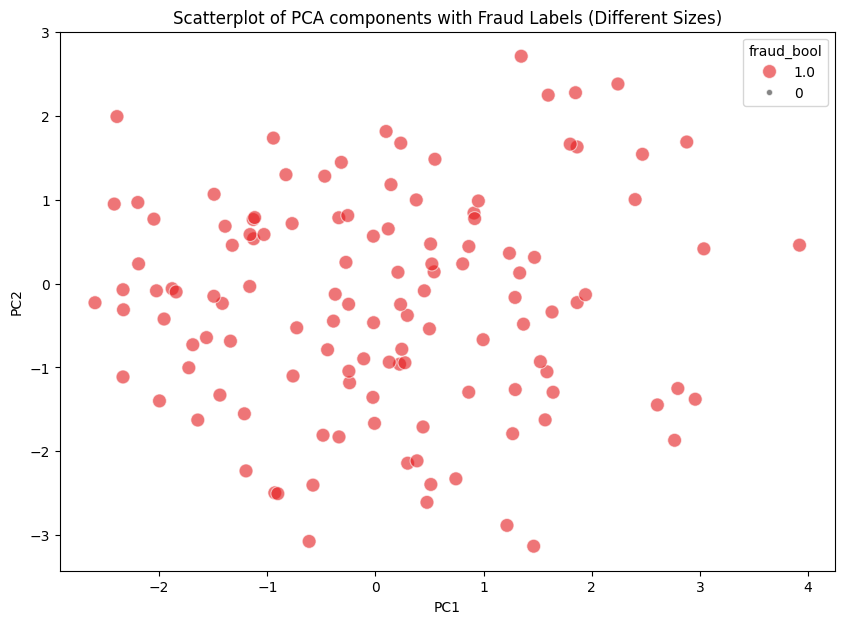

In [348]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_pca_frau[0], y=df_pca_frau[1], hue=df_fraudulent['fraud_bool'], palette='Set1', alpha=0.6, size=df['fraud_bool'], sizes={0: 20, 1: 100})
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PCA components with Fraud Labels (Different Sizes)')
plt.show()

### Segunda Iteracion

In [371]:
pca2 = PCA(2)

In [373]:
pca2.fit(frau_X_scaled)

PCA(n_components=2)

In [375]:
pca2.explained_variance_ratio_.round(3)

array([0.095, 0.089])

In [377]:
# Varianza acumulada explicada
var_explained_cum=np.cumsum(pca2.explained_variance_ratio_).round(3)
var_explained_cum

array([0.095, 0.183])

In [379]:
X_fraud_pca2 = pca2.fit_transform(frau_X_scaled)

In [381]:
X_fraud_pca2.shape

(11029, 2)

In [383]:
# Convertimos a DataFrame con los datos scalados
df_pca2_frau = pd.DataFrame(X_fraud_pca2)
df_pca2_frau

,0,1
0,-0.448634,1.894639
1,-2.610715,1.494872
2,0.608016,4.336020
3,-0.766847,1.265953
4,0.213184,-0.405693
...,...,...
11024,-1.404151,-2.667346
11025,3.050606,-0.502484
11026,1.311907,-0.758892
11027,2.993621,-1.915718


In [387]:
# Aplicar K-Means (por ejemplo, con 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_pca2_frau)

KMeans(n_clusters=2, random_state=42)

In [389]:
# Agregar los labels de los clusters al DataFrame de transacciones fraudulentas
df_fraudulent_scaled['cluster'] = kmeans.labels_

In [409]:
df_fraudulent_scaled.shape

(11029, 23)

In [391]:
df_pca2_frau

,0,1
0,-0.448634,1.894639
1,-2.610715,1.494872
2,0.608016,4.336020
3,-0.766847,1.265953
4,0.213184,-0.405693
...,...,...
11024,-1.404151,-2.667346
11025,3.050606,-0.502484
11026,1.311907,-0.758892
11027,2.993621,-1.915718


In [399]:
df_pca2_frau.shape

(11029, 2)

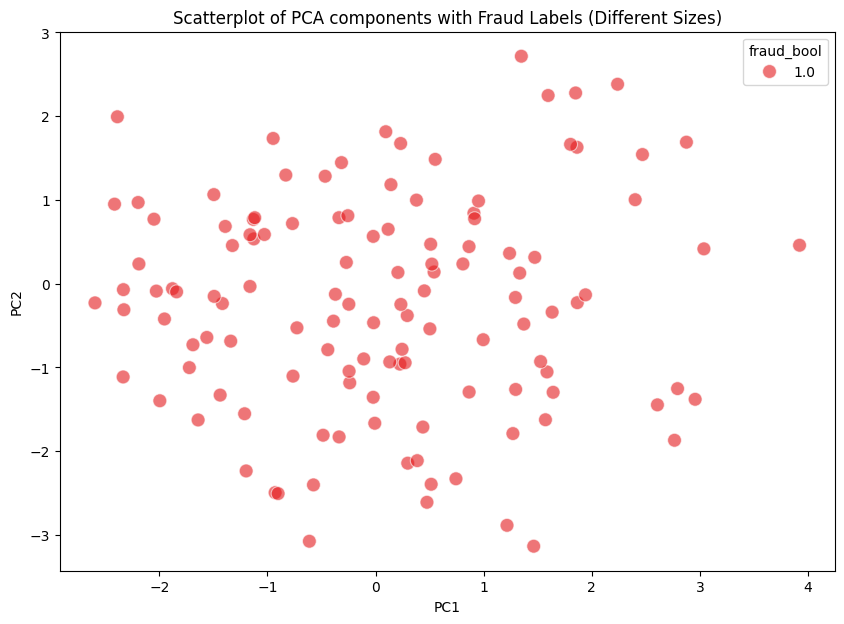

In [413]:

plt.figure(figsize=(10,7))
sns.scatterplot(x=df_pca2_frau[0], y=df_pca2_frau[1], hue=df_fraudulent['fraud_bool'], palette='Set1', alpha=0.6, size=df_fraudulent['fraud_bool'], sizes={0: 20, 1: 100})
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PCA components with Fraud Labels (Different Sizes)')
plt.show()

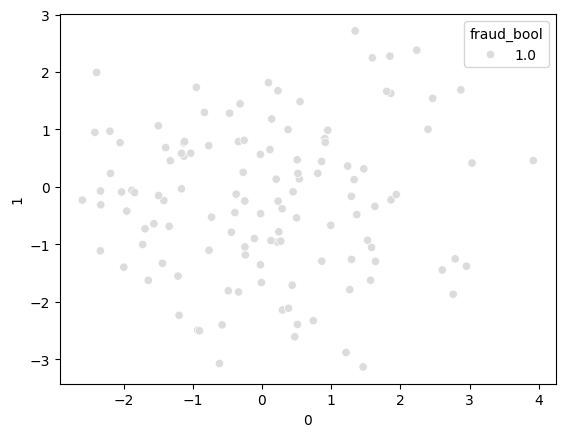

In [415]:
sns.scatterplot(x=df_pca2_frau[0], y=df_pca2_frau[1], hue=df_fraudulent['fraud_bool'], palette='coolwarm')
plt.show()

Aplica el método del codo para obtener el número óptimo de clusters previamente

Aplica el algoritmo k_means. Para cada conjunto de datos printea el número de registros que pertenen a dicho cluster y estadísticos de cada variable numérica. Para las variables binarias puedes graficar la cantidad de 0s y 1s por cluster.
¿Qué observas? ¿Tienen los clusters un tamaño similar? 

*Idea*: Puedes guardar la media por ejemplo de cada variable por cluster en un dataframe, de forma que tengas todos los valores agrupados y se más fácil de comparar.

#### k-Means sobre PCA dataset

Dado que vimos que k-Means es un algoritmo basado en distancias, dijimos que era mejor normalizar los datos. Pero también es muy beneficioso utilizar un dataset en el que hemos reducido su dimensionalidad. 
Es una práctica común aplicar PCA antes de un algoritmo de agrupamiento (como k-means) ya que  puede mejorar los resultados de la agrupación en debido a que reducce de ruido.

Utiliza el dataset del Caso Práctico Final de la asignatura de Análisis Exploratorio de Datos en el que aplicabas un PCA sobre tres componentes principales y sobre este dataset aplica k-Means.

Obtén mediante el método del codo el número de clusters idóneo. Realiza un k-means y analiza sus resultados.

### SCALER

In [583]:
from sklearn.decomposition import PCA
pca =  PCA(12)

In [585]:
X_pca = pca.fit_transform(X_scaled)

In [586]:
X_pca.shape

(1000000, 12)

In [589]:
# Convertimos a DataFrame con los datos scalados
df_pca = pd.DataFrame(X_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.754248,-2.465617,-2.187308,0.584848,1.290780,1.874251,-0.706909,1.781890,0.714794,0.435399,-1.187546,-1.375118
1,-0.963815,-0.561280,-2.123038,-1.014363,-0.994692,-0.982303,-1.183139,0.469597,0.647314,-0.544533,-0.773678,-0.050409
2,-1.447861,-0.793046,-0.204929,0.343229,1.611636,0.626857,-0.285288,-0.490699,-0.088279,-0.160028,-1.159563,-1.260215
3,-2.664102,-0.456530,-0.447387,-0.969300,0.409111,-0.701948,-0.781629,0.515289,-0.603448,-0.335535,0.151200,-0.716157
4,-0.663506,-1.504273,0.564862,0.566558,0.671587,1.121061,2.107769,1.938425,1.539265,-0.203690,0.089208,-0.054267
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.938834,0.488329,-1.113073,1.119202,1.701360,0.074990,-1.757021,-1.029152,-0.153230,0.008514,-1.476447,1.792338
999996,3.816871,1.525569,-1.516153,-0.421157,-0.891124,0.561763,1.863445,-0.705296,0.614192,0.042628,-0.536117,-0.302585
999997,1.209033,0.990439,0.093876,2.111084,2.067724,1.100663,0.273071,-0.603669,-0.705928,0.722725,-0.606029,1.506290
999998,0.285894,2.004375,-0.146809,-0.076644,0.088765,-0.841620,-0.261198,0.948701,-0.033191,-1.140969,1.505298,0.959986


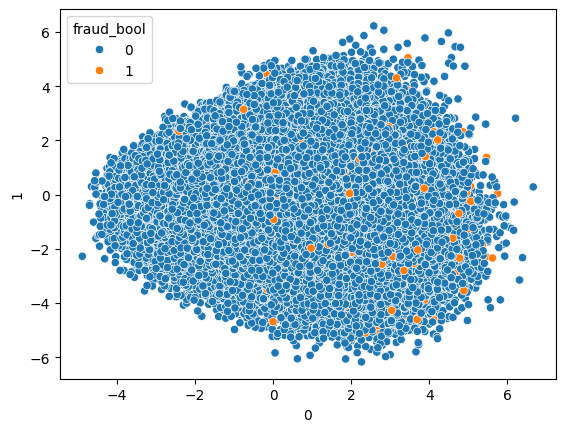

In [591]:
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=df['fraud_bool'])
plt.show()

KMeans(n_clusters=1, random_state=0)
KMeans(n_clusters=2, random_state=0)
KMeans(n_clusters=3, random_state=0)
KMeans(n_clusters=4, random_state=0)
KMeans(n_clusters=5, random_state=0)
KMeans(n_clusters=6, random_state=0)
KMeans(n_clusters=7, random_state=0)
KMeans(random_state=0)
KMeans(n_clusters=9, random_state=0)
KMeans(n_clusters=10, random_state=0)


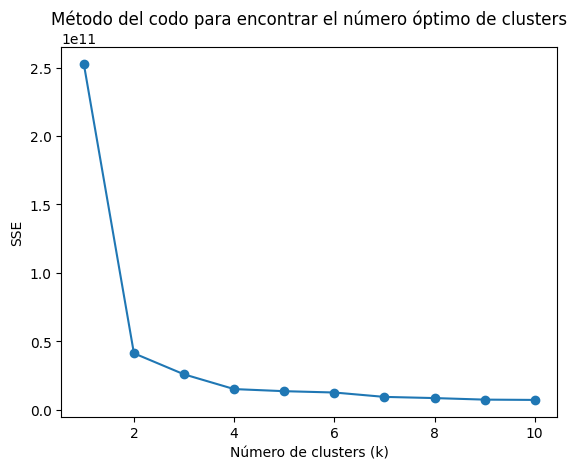

In [593]:
# Lista para almacenar los SSE para diferentes números de clusters
sse = []

# Probar una cantidad de clusters entre 1 y 10 (ajusta el rango si es necesario)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[numerica_columns])
    print(kmeans)
    sse.append(kmeans.inertia_)  # `inertia_` es el valor de SSE para el modelo K-Means actual

# Graficar el resultado
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()

Se proporciona el código para realizar una visualización en 3D.

In [595]:
kmeans = KMeans(n_clusters=2, random_state=0)  # Ajusta el número de clusters según tus necesidades
df['Cluster'] = kmeans.fit_predict(df_scaled[numerica_columns])  # Si escalaste, usa `df_scaled`

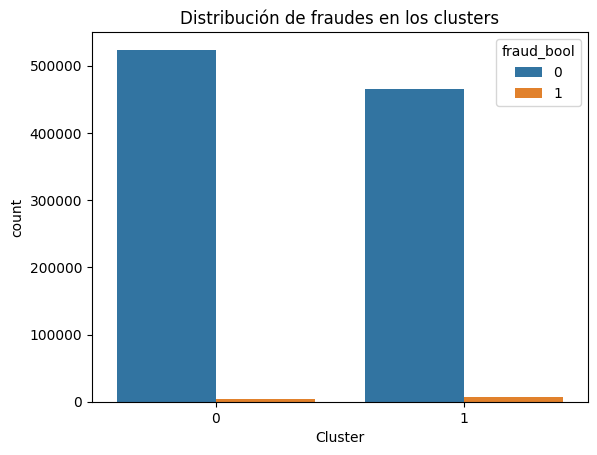

In [597]:
sns.countplot(x='Cluster', hue='fraud_bool', data=df)
plt.title('Distribución de fraudes en los clusters')
plt.show()

In [599]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.24786829,  0.04181773, -0.17888507, -0.38432123,  0.14712769,
         0.00350918,  0.28761724,  0.44036786, -0.03425829,  0.46126541,
        -0.32494927,  0.09490584, -0.28463503,  0.13892338,  0.00418614,
        -0.20198048, -0.22173398,  0.01792   ,  0.09527737,  0.05344317,
         0.03643115, -0.48700561],
       [ 0.27617058, -0.04659259,  0.19931067,  0.4282041 , -0.16392714,
        -0.00390987, -0.32045818, -0.49065029,  0.03817   , -0.51393397,
         0.36205288, -0.10574246,  0.31713545, -0.15478604, -0.00466412,
         0.22504317,  0.24705219, -0.01996615, -0.10615641, -0.05954546,
        -0.04059096,  0.54261327]])

In [635]:
X_fraud_pca.shape

(11029, 22)

In [637]:
df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_24h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,Cluster
0,-0.904778,1.704497,-0.696644,0.524782,-0.295501,4.634885,-0.330368,1.686252,-0.354344,-0.818002,0.672461,0.939436,-0.845868,0.352143,-0.176256,-0.535706,2.018520,-0.160921,1.080517,0.856307,-0.101305,-1.488092,1
1,0.817326,0.427954,0.027285,-1.138310,-0.290328,-0.470003,0.382688,0.727229,-0.539285,1.357506,0.560201,0.939436,1.182218,0.352143,-0.765758,-0.535706,2.018520,-0.160921,-0.520482,0.856307,-0.101305,-1.488092,4
2,0.817326,1.739779,-0.821069,0.524782,-0.286917,-0.501671,-0.277203,0.577568,0.093032,0.490208,-0.250572,0.939436,-0.845868,0.352143,1.592250,-0.535706,-0.647820,-0.160921,1.890380,-1.167806,-0.101305,-1.488092,6
3,0.128484,-0.064312,-0.821069,-0.306764,-0.295107,-0.520089,1.563775,1.224639,-0.038186,0.781144,-0.238099,0.939436,-0.845868,0.352143,-0.849972,-0.535706,-0.647820,-0.160921,0.954908,0.856307,-0.101305,-1.488092,5
4,1.161747,1.205752,-0.651398,0.524782,2.657447,1.902092,0.930177,0.375805,-0.855444,-0.527066,-0.225625,-1.039149,1.182218,0.352143,1.255392,-0.535706,-0.647820,-0.160921,-0.473278,-1.167806,-0.101305,-1.488092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.817326,-1.276279,0.638099,-0.306764,-0.228172,-0.468851,-1.430742,-1.257870,0.543958,-0.052748,2.443688,0.939436,1.182218,0.352143,1.676465,-0.535706,2.018520,-0.160921,1.173000,-1.167806,-0.101305,1.679338,4
999996,1.161747,1.144317,1.203668,-0.306764,-0.291103,-0.427611,-1.846286,-1.572955,-1.171602,-0.818002,1.570548,-1.039149,1.182218,0.352143,-0.934187,1.866694,0.993005,-0.160921,-0.751992,-1.167806,-0.101305,1.679338,7
999997,0.817326,-1.220244,1.305470,-1.969856,-0.216491,2.072949,-0.881064,-0.707148,-0.670503,-1.583256,1.071611,0.939436,-0.845868,0.352143,1.676465,-0.535706,-0.647820,-0.160921,1.061066,-1.167806,-0.101305,1.679338,1
999998,1.161747,-1.698969,-0.945494,-0.306764,-0.270073,-0.492924,-0.972800,1.116392,-0.223126,-0.052748,0.485360,-1.039149,-0.845868,0.352143,-0.849972,-0.535706,-0.647820,-0.160921,-0.767606,0.856307,-0.101305,1.679338,2


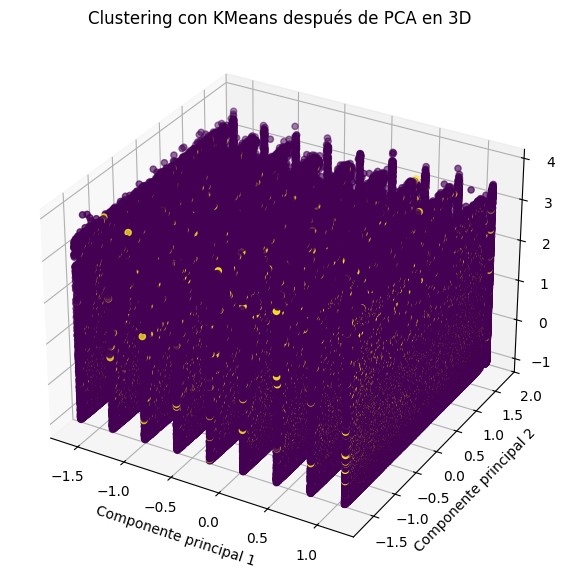

In [633]:
# Visualizar los clusters en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled['income'], df_scaled['name_email_similarity'], df_scaled['current_address_months_count'], c=df['fraud_bool'], cmap='viridis')
plt.scatter(centroids, centroids, marker='^', s=100,color='black')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.set_title('Clustering con KMeans después de PCA en 3D')

plt.show()